In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import tensorflow

In [3]:
data = pd.read_csv(r'DNEdited_weekly_rigs_and_oil_price.csv')

d_time = data['Date'] #time
d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
d_price_Brent = data['Brent_Oil_Price']

data.set_index('Date',inplace = True)

train = data.iloc[30:,[0,2]]
test = data.iloc[0:30,[0,2]]
train = pd.DataFrame(train)
test = pd.DataFrame(test)

train.set_index('WTI_Oil_Price',inplace = True)
test.set_index('WTI_Oil_Price',inplace = True)

In [4]:
#data.head()
#train.head()
train

,Rigs_Count
WTI_Oil_Price,
52.69,790
56.15,794
58.29,796
60.84,781
61.74,796
...,...
20.80,998
21.52,983
21.25,973


In [5]:
train

,Rigs_Count
WTI_Oil_Price,
52.69,790
56.15,794
58.29,796
60.84,781
61.74,796
...,...
20.80,998
21.52,983
21.25,973


C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

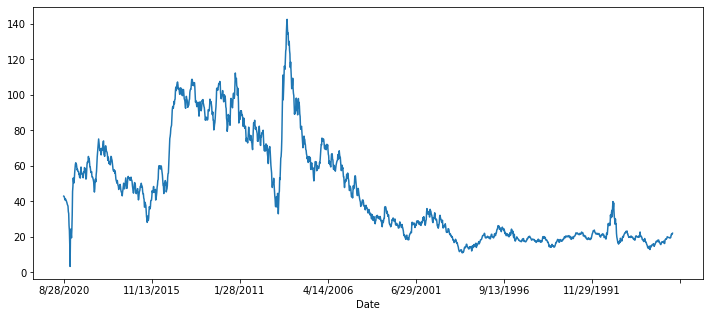

In [6]:
data['WTI_Oil_Price'].plot(figsize=(12,5))

C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

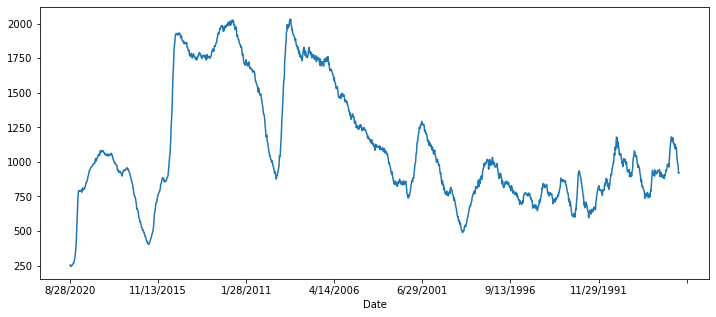

In [7]:
data['Rigs_Count'].plot(figsize=(12,5))

In [8]:
#Axes3D.scatter(d_price_WTI, d_rigs, zs=0, zdir='z', s=20, c=None, depthshade=True)

# d_time = data['Date'] #time
# d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
# d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
# d_price_Brent

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#this is a must
scaler.fit(train)#scaler only takes dataframe intead of series

MinMaxScaler()

In [10]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
# df_scaled_train = pd.DataFrame(scaled_train)
# df_scaled_train.plot(figsize=(12,5))
# train.plot(figsize=(12,5))

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator #what is this

In [13]:
# define generator, equally spaced data rows
n_input = 30
n_features = 1
#batch size too large will overfit
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=4)

In [14]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.23724647 0.23970498 0.24093423 0.23171481 0.24093423 0.24646589
 0.25138291 0.24277812 0.24277812 0.244622   0.24523663 0.24708052
 0.25384143 0.25691457 0.26183159 0.27473878 0.27781192 0.2771973
 0.28027044 0.28518746 0.29625077 0.30362631 0.30731407 0.31468961
 0.32636755 0.32575292 0.33066994 0.33312846 0.33804548 0.340504
 0.23970498 0.24093423 0.23171481 0.24093423 0.24646589 0.25138291
 0.24277812 0.24277812 0.244622   0.24523663 0.24708052 0.25384143
 0.25691457 0.26183159 0.27473878 0.27781192 0.2771973  0.28027044
 0.28518746 0.29625077 0.30362631 0.30731407 0.31468961 0.32636755
 0.32575292 0.33066994 0.33312846 0.33804548 0.340504   0.34357714
 0.24093423 0.23171481 0.24093423 0.24646589 0.25138291 0.24277812
 0.24277812 0.244622   0.24523663 0.24708052 0.25384143 0.25691457
 0.26183159 0.27473878 0.27781192 0.2771973  0.28027044 0.28518746
 0.29625077 0.30362631 0.30731407 0.31468961 0.32636755 0.32575292
 0.33066994 0.33312846 0.33804548 0.340504   0.

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [16]:
n_input = 30
n_features = 1
#batch size too large will overfit
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=4)

In [17]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences = True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 150)           91200     
_________________________________________________________________
dropout (Dropout)            (None, 30, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 150)           180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 150)           180600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               1

In [19]:
model.fit_generator(train_generator,epochs=83)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/83
418/418 [==============================] - 42s 100ms/step - loss: 0.0158
Epoch 2/83
418/418 [==============================] - 42s 101ms/step - loss: 0.0073
Epoch 3/83
418/418 [==============================] - 42s 100ms/step - loss: 0.0042
Epoch 4/83
418/418 [==============================] - 43s 102ms/step - loss: 0.0032
Epoch 5/83
418/418 [==============================] - 43s 102ms/step - loss: 0.0028
Epoch 6/83
418/418 [==============================] - 44s 104ms/step - loss: 0.0032
Epoch 7/83
418/418 [==============================] - 43s 103ms/step - loss: 0.0022
Epoch 8/83
418/418 [==============================] - 43s 102ms/step - loss: 0.0021
Epoch 9/83
418/418 [==============================] - 43s 103ms/step - loss: 0.0028
Epoch 10/83
418/418 [==============================] - 44s 104ms/step - loss: 0.0024
Epoch 11/83
418/418 [==============================] - 43s 102ms/step - loss: 0.001

In [20]:
model.history.history.keys()

dict_keys(['loss'])

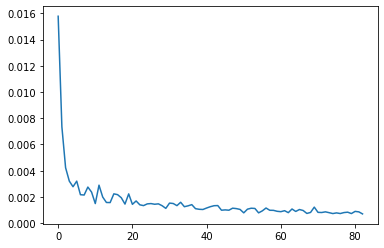

In [21]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

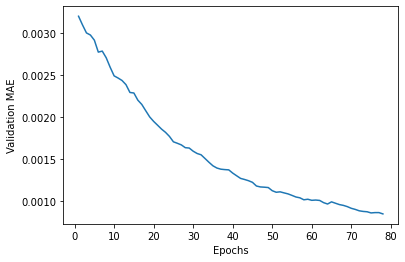

In [22]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(loss_per_epoch[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
# 10 history steps --> step 13
# last 10 points in train --> pt 1 in test data
first_eval_batch = scaled_train[-n_input:]

In [24]:
first_eval_batch

array([[0.35771358],
       [0.34419176],
       [0.38229871],
       [0.3995083 ],
       [0.42901045],
       [0.44068838],
       [0.45543946],
       [0.46957591],
       [0.47756607],
       [0.45974186],
       [0.46527351],
       [0.45974186],
       [0.47326368],
       [0.45298095],
       [0.44683467],
       [0.44622004],
       [0.44867855],
       [0.4302397 ],
       [0.44437615],
       [0.42409342],
       [0.42839582],
       [0.43269822],
       [0.42716656],
       [0.39643516],
       [0.37369392],
       [0.36508912],
       [0.3558697 ],
       [0.34972342],
       [0.31530424],
       [0.31837738]])

In [25]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))# make it 3 dimensional

In [26]:
model.predict(first_eval_batch)

array([[0.30704474]], dtype=float32)

In [27]:
scaled_test[0]

array([-0.09219422])

In [28]:
test_predictions = []

# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]

# reshape this to the format RNN wants(same format as TimeSeries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

#how far into the future will I forecast?
#len(test) -->I can also change to 24

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [29]:
test_predictions

[array([0.30704474], dtype=float32),
 array([0.29679322], dtype=float32),
 array([0.28686696], dtype=float32),
 array([0.2770286], dtype=float32),
 array([0.267515], dtype=float32),
 array([0.25844112], dtype=float32),
 array([0.24995792], dtype=float32),
 array([0.24245378], dtype=float32),
 array([0.23620884], dtype=float32),
 array([0.23136823], dtype=float32),
 array([0.22800794], dtype=float32),
 array([0.22606951], dtype=float32),
 array([0.22541149], dtype=float32),
 array([0.22588733], dtype=float32),
 array([0.22738539], dtype=float32),
 array([0.22979416], dtype=float32),
 array([0.2329872], dtype=float32),
 array([0.23688781], dtype=float32),
 array([0.24139345], dtype=float32),
 array([0.2464143], dtype=float32),
 array([0.25184858], dtype=float32),
 array([0.2576586], dtype=float32),
 array([0.2637405], dtype=float32),
 array([0.2699171], dtype=float32),
 array([0.27621892], dtype=float32),
 array([0.2829401], dtype=float32),
 array([0.2902706], dtype=float32),
 array([0.2

In [30]:
scaled_test

array([[-0.09219422],
       [-0.09219422],
       [-0.0983405 ],
       [-0.09649662],
       [-0.09403811],
       [-0.09403811],
       [-0.09280885],
       [-0.08973571],
       [-0.08666257],
       [-0.08543331],
       [-0.08481868],
       [-0.07682852],
       [-0.07375538],
       [-0.0633067 ],
       [-0.05285802],
       [-0.03995083],
       [-0.01843884],
       [ 0.00245851],
       [ 0.03749232],
       [ 0.07682852],
       [ 0.12169637],
       [ 0.15980332],
       [ 0.19913952],
       [ 0.22618316],
       [ 0.23847572],
       [ 0.23909035],
       [ 0.23724647],
       [ 0.23786109],
       [ 0.23724647],
       [ 0.23724647]])

In [31]:
true_predictions = scaler.inverse_transform(test_predictions)

In [32]:
true_predictions

array([[903.56179929],
       [886.88257289],
       [870.73254865],
       [854.72551665],
       [839.24691099],
       [824.48370287],
       [810.68153441],
       [798.47230616],
       [788.31178464],
       [780.43610825],
       [774.96892235],
       [771.81509274],
       [770.74449359],
       [771.51868328],
       [773.95602436],
       [777.87509756],
       [783.07016668],
       [789.41647112],
       [796.74713814],
       [804.91607225],
       [813.75763714],
       [823.21054351],
       [833.10580936],
       [843.15512279],
       [853.40818438],
       [864.34352595],
       [876.2702609 ],
       [889.6416586 ],
       [904.79534364],
       [921.79905427]])

In [33]:
test['Predictions'] = true_predictions

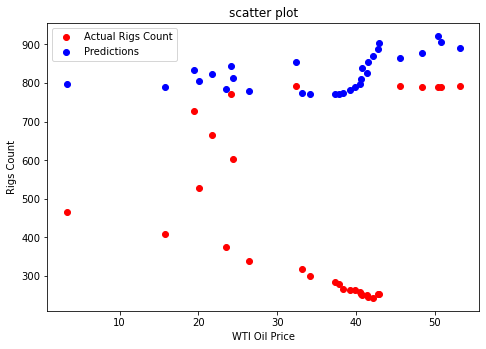

In [34]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
test_2 = test.reset_index()
ax.scatter(test_2['WTI_Oil_Price'], test_2['Rigs_Count'], color='r',label = "Actual Rigs Count")
ax.scatter(test_2['WTI_Oil_Price'], test_2['Predictions'], color='b', label = "Predictions")
ax.set_xlabel('WTI Oil Price')
ax.set_ylabel('Rigs Count')
ax.set_title('scatter plot')
plt.legend()
plt.show()